# Yelp Data Challenge - Clustering and PCA

Zhenning Tan 6/22/2017

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [20]:
df = pd.read_csv('yelp_dataset_challenge_round9/last_2_years_restaurant_reviews.csv')

In [21]:
df.head()

,business_id,name,categories,ave_stars,cool,date,funny,review_id,stars,text,type,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-07-28,0,iHP55csZHjPGqOMwIo70qQ,5,Exceptional...exceptional steakhouse!! Ordered...,review,0,TU5j2S_Ub__ojLOpD_UepQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-07-17,0,GWI2xpBBwxK9-w1etLz51A,5,In a city with overrated 'celebrity' steakhous...,review,0,OC_WdUmY2fK-c1SD4JqSsw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-10-30,0,CyZFXdnTCgpnKHNtIiKvaQ,3,The service was great. The appetizer bread was...,review,0,A6zYXofgFj6UhonFPrEDHw
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-08-08,0,QxE_WJYBMsgzPk9ZBJ6bgA,5,"Great service, great food, great environment. ...",review,0,WHT6g24E7_B9aZiKgUgB6Q
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2016-10-15,0,gvvuzwPWHuRdKVv-P6OTRw,5,"We were served chicken skewers, prosciutto, an...",review,0,Cn8UFE9uvIt-yFnASEmJnQ


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [22]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df["text"]

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [23]:
# Make a column and take the values, save to a variable named "target"
target = (df["stars"] ==5).astype(int)

#### You may want to look at the statistic of the target variable

In [24]:
# To be implemented
target.value_counts()

0    56928
1    54620
Name: stars, dtype: int64

### Create training dataset and test dataset

In [25]:
from sklearn.cross_validation import train_test_split

In [26]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
x_train, x_test, y_train, y_test = train_test_split(documents, target, test_size = 0.1, random_state=100)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(max_features = 1000, stop_words = "english")

In [29]:
# Train the model with your training data
vec_train = vectorizer.fit_transform(x_train)

In [30]:
# Get the vocab of your tfidf
vocab = vectorizer.get_feature_names()

In [31]:
# Use the trained model to transform all the reviews
vec_doc = vectorizer.transform(documents)

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [32]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 100) # use 5 clusters since there are 5 stars
kmeans.fit(vec_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=100, tol=0.0001,
    verbose=0)

#### Make predictions on all your data

In [33]:
# To be implemented
kmeans.predict(vec_doc)

array([4, 4, 1, ..., 4, 3, 4])

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [34]:
# To be implemented
centers = kmeans.cluster_centers_

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [35]:
# To be implemented
top_centroids = centers.argsort(axis =1)[:,-1:-11:-1]

print "Top features for each centroid:"
for num, centroid in enumerate(top_centroids):
    print "Cluster %d: %s" % (num, ", ".join(vocab[i] for i in centroid))

Top features for each centroid:
Cluster 0: food, order, just, service, time, minutes, like, place, don, came
Cluster 1: good, chicken, food, like, really, ordered, place, just, burger, got
Cluster 2: pizza, crust, good, place, great, slice, cheese, best, just, order
Cluster 3: great, food, service, place, good, amazing, awesome, definitely, friendly, atmosphere
Cluster 4: place, food, best, amazing, vegas, love, service, sushi, delicious, friendly


#### Try different k
If you set k == to a different number, how does the top features change?

In [36]:
# To be implemented
k_num = [2, 3, 4, 5]

for k in k_num: 
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(vec_train)
    centers = kmeans.cluster_centers_
    top_centroids = centers.argsort(axis =1)[:,-1:-11:-1]
    print "Top features for each centroid in %d nearest neighbors:" % k
    for num, centroid in enumerate(top_centroids):
        print "Cluster %d: %s" % (num, ", ".join(vocab[i] for i in centroid))
        print ""

Top features for each centroid in 2 nearest neighbors:
Cluster 0: good, food, place, like, just, time, ordered, service, order, really

Cluster 1: great, food, service, place, amazing, best, love, good, friendly, vegas

Top features for each centroid in 3 nearest neighbors:
Cluster 0: great, food, service, place, amazing, friendly, good, love, staff, awesome

Cluster 1: good, place, food, chicken, like, vegas, really, best, delicious, just

Cluster 2: pizza, food, order, time, just, service, minutes, place, like, came

Top features for each centroid in 4 nearest neighbors:
Cluster 0: great, food, service, place, amazing, good, friendly, awesome, definitely, love

Cluster 1: good, place, food, chicken, best, vegas, like, delicious, really, service

Cluster 2: food, order, time, just, service, like, minutes, came, didn, place

Cluster 3: pizza, crust, good, place, great, slice, cheese, best, just, service

Top features for each centroid in 5 nearest neighbors:
Cluster 0: food, order, jus

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [37]:
# To be implemented
assigned_cluster = kmeans.predict(vec_doc)
k=5 # use k =5 as an example: 

for i in range(k):
    cluster = np.arange(vec_doc.shape[0])[assigned_cluster ==i]
    sample_ind = np.random.choice(cluster)
    print "A random review from Cluster %d" % i
    print "star rating:", df.ix[sample_ind]["stars"]
    print df.ix[sample_ind]["text"]
    print ""

A random review from Cluster 0
star rating: 1
I don't know what happened to this place over the last 6 months??????? Horrible service with rude waitress and food took forever to come to the table. Every piece of shushi was soaked with nasty tasting sauce. I  am very disappointed that I wasted my time and 100 on gross food.

A random review from Cluster 1
star rating: 3
The staff member who took my order was very friendly and my order didn't take too long. I got the Hokkaido milk tea with honey boba and I really wanted to like it but compared to another tea place I frequent, it didn't taste quite as good. But the honey boba was delicious served warm and the texture was almost perfect and I would have to say my favorite boba in town. I will be back to try the other menu items. 

Don't get the taro milk tea. It was very disappointing. It was very gritty and just tasted like watered down milk with no taro

A random review from Cluster 2
star rating: 5
Love love this place! It's right by th

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [38]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
top_restaurant = df["business_id"].value_counts().argmax()
df_top_restaurant = df[df["business_id"] == top_restaurant]
df_top_restaurant.reset_index()
df_top_restaurant.head()

,business_id,name,categories,ave_stars,cool,date,funny,review_id,stars,text,type,useful,user_id
82697,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-10-01,0,xgeXscn1gdG5I9w-p2tqig,5,Excellent food with great service that's near ...,review,1,mtGw8bQTQToVR_1KWD7F7A
82698,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-08-20,0,jHeg2v19v4RsN2UnDlCsFQ,5,We were in town for the weekend and really enj...,review,0,RVGxGRTnVOeCLMPT4JAYuw
82699,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-11-11,0,G6EpvRrtUbzxUVzyk8qsAw,5,"Wow!!!this restaurant is on my top five best, ...",review,0,TIFzeoY3JqWmZjFBbeOYiw
82700,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-10-15,0,j_skfznARdMJvzWG1hy38w,4,"This was our first meal in Vegas and really, n...",review,1,INPppZR6jwq_oR5u88ObuA
82701,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5,0,2016-08-19,0,O5QVoQkGNpLSeaB_u7p3Rg,5,I'm never disappointed whenever I dine here. M...,review,0,CXzDMPKfGqZUw-jefNrbCA


We can also load restaurant profile information from the business dataset (optional)

In [39]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
business = pd.read_csv('yelp_dataset_challenge_round9/selected_business.csv')
business[business["business_id"] == top_restaurant]

,business_id,name,categories,ave_stars
1192,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Korean, Japanese, Restaurants, Tapas/Small Pl...",4.5


### Vectorize the text feature

In [40]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant["text"]

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [41]:
# To be implemented
target_top_restaurant = (df_top_restaurant["stars"] ==5).astype(int)

#### Check the statistic of the target variable

In [42]:
# To be implemented
target_top_restaurant.value_counts()

1    806
0    229
Name: stars, dtype: int64

### Create training dataset and test dataset

In [43]:
from sklearn.cross_validation import train_test_split

In [44]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
train_x_top, test_x_top, train_y_top, test_y_top = train_test_split(documents_top_restaurant, target_top_restaurant, test_size = 0.3,
                                                   random_state =100)

### Get NLP representation of the documents

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(max_features = 1000, stop_words = "english")

In [47]:
# Train the model with your training data
vec_train_top = vectorizer.fit_transform(train_x_top)

In [48]:
# Get the vocab of your tfidf
vocab_top = vectorizer.get_feature_names()

In [49]:
# Use the trained model to transform the test data
vec_test_top = vectorizer.transform(test_x_top)

In [50]:
# Use the trained model to transform all the data
vec_top = vectorizer.transform(documents_top_restaurant)

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [51]:
# To be implemented
kmeans_top = KMeans(n_clusters = 8, random_state = 100)
kmeans_top.fit(vec_train_top)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=100, tol=0.0001,
    verbose=0)

#### Make predictions on all your data

In [52]:
# To be implemented
kmeans_top.predict(vec_top)

array([5, 2, 7, ..., 6, 6, 1])

#### Inspect the centroids

In [53]:
# To be implemented
centers_top = kmeans_top.cluster_centers_

#### Find the top 10 features for each cluster.

In [54]:
# To be implemented
top_centroids_top_restaurant = centers_top.argsort(axis =1)[:,-1:-11:-1]

print "Top features for each centroid:"
for num, centroid in enumerate(top_centroids_top_restaurant):
    print "Cluster %d: %s" % (num, ", ".join(vocab_top[i] for i in centroid))

Top features for each centroid:
Cluster 0: meat, lovers, food, definitely, got, great, people, lover, ordered, service
Cluster 1: great, food, service, delicious, place, atmosphere, experience, fun, definitely, friendly
Cluster 2: good, food, really, service, place, price, vegas, nice, meat, korean
Cluster 3: beef, kalbi, spicy, soup, korean, good, tender, pork, favorite, place
Cluster 4: come, time, definitely, amazing, vegas, food, great, service, excellent, las
Cluster 5: korean, bbq, best, place, vegas, great, food, service, ve, meat
Cluster 6: hour, happy, great, service, food, place, come, awesome, amazing, bbq
Cluster 7: cream, ice, free, macaron, review, great, food, dessert, macaroon, amazing


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [55]:
# To be implemented
assigned_cluster_top = kmeans_top.predict(vec_top)

for i in range(kmeans_top.n_clusters):
    cluster = df_top_restaurant.index.values[assigned_cluster_top == i]
    sample_ind = np.random.choice(cluster, 1)
    print "A random review from Cluster %d" % i
    print "star rating: %d" % df_top_restaurant.ix[sample_ind]["stars"]
    print df_top_restaurant.ix[sample_ind]["text"].values[0]
    print "=================================="

A random review from Cluster 0
star rating: 4
Got here around 3pm. Got seated very fast. We got 2 combo for 5 people which was perfect amount. We were all very full. Good quality meat.  Woot.
A random review from Cluster 1
star rating: 5
Our new favorite place to eat in Vegas!  Great food, great service, great prices, good ambiance! What more can you ask for! Definitely coming back again.
A random review from Cluster 2
star rating: 5
We tried this place based on all the Yelp reviews, and it certainly did not disappoint!!!  We came in with a big group which included kids.  They had so much fun cooking all their food.  The portions are ample and very good.  Definitely will come back when we're back in Vegas.
A random review from Cluster 3
star rating: 5
I'm never disappointed whenever I dine here. My bf absolutely loves the kalbi stew. You can never go wrong with the spicy seafood tofu soup as well. Service is equally as awesome as the food!
A random review from Cluster 4
star rating: 5


## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [56]:
from sklearn.preprocessing import StandardScaler

# To be implemented
scaler = StandardScaler(with_mean = False)
train_scaled = scaler.fit_transform(vec_train_top).todense()
test_scaled = scaler.transform(vec_test_top).todense()


### Use PCA to transform data (train and test) and get princial components

In [57]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# To be implemented
pca = PCA(n_components = n_components)
train_comp = pca.fit_transform(train_scaled)
test_comp = pca.transform(test_scaled)

### See how much (and how much percentage of) variance the principal components explain

In [58]:
# To be implemented
pca.explained_variance_

array([ 9.92154822,  6.44590037,  6.36747625,  6.27074932,  5.84048327,
        5.72836861,  5.59609994,  5.44317619,  5.40457023,  5.28994498,
        5.18991101,  5.16128511,  5.02565899,  4.97164341,  4.88171552,
        4.81565091,  4.77653643,  4.73298122,  4.68345563,  4.64856511,
        4.60490233,  4.584986  ,  4.51991916,  4.48751325,  4.4063545 ,
        4.38927176,  4.36558177,  4.32401176,  4.30173868,  4.28411584,
        4.24771056,  4.21125152,  4.17759342,  4.13153797,  4.11971756,
        4.09066693,  4.04474889,  4.01993289,  3.97507546,  3.95440209,
        3.92461682,  3.91870332,  3.88260682,  3.83456171,  3.81989312,
        3.78154934,  3.76656381,  3.74307117,  3.73614551,  3.72996013])

In [59]:
# To be implemented
pca.explained_variance_ratio_

array([ 0.00992155,  0.0064459 ,  0.00636748,  0.00627075,  0.00584048,
        0.00572837,  0.0055961 ,  0.00544318,  0.00540457,  0.00528994,
        0.00518991,  0.00516129,  0.00502566,  0.00497164,  0.00488172,
        0.00481565,  0.00477654,  0.00473298,  0.00468346,  0.00464857,
        0.0046049 ,  0.00458499,  0.00451992,  0.00448751,  0.00440635,
        0.00438927,  0.00436558,  0.00432401,  0.00430174,  0.00428412,
        0.00424771,  0.00421125,  0.00417759,  0.00413154,  0.00411972,
        0.00409067,  0.00404475,  0.00401993,  0.00397508,  0.0039544 ,
        0.00392462,  0.0039187 ,  0.00388261,  0.00383456,  0.00381989,
        0.00378155,  0.00376656,  0.00374307,  0.00373615,  0.00372996])

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [60]:
# To be implemented
import matplotlib.pyplot as plt
%matplotlib inline

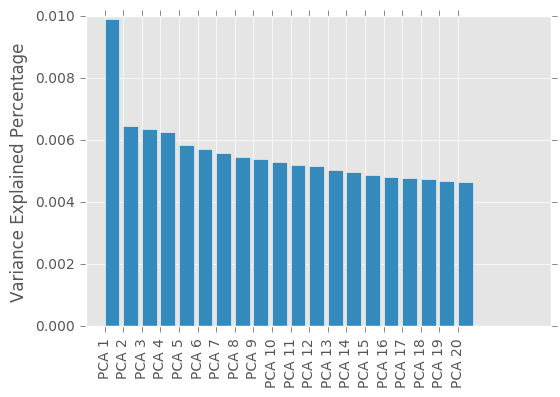

In [61]:
pca_xrange = np.arange(20) +1
pca_ylabel = ["PCA %d" % i for i in pca_xrange]

plt.bar(pca_xrange, pca.explained_variance_ratio_[:20])
xticks = plt.xticks(pca_xrange, pca_ylabel, rotation=90)
y_label = plt.ylabel('Variance Explained Percentage')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [62]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
logistic_clf = LogisticRegression(random_state = 100)
logistic_clf.fit(train_scaled, train_y_top)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
# Get score for training set
logistic_clf.score(train_scaled, train_y_top)

1.0

In [64]:
# Get score for test set
logistic_clf.score(test_scaled, test_y_top)

0.752411575562701

#### Use (Stardardized + PCA) tf-idf vectors as features

In [65]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
logistic_clf = LogisticRegression(random_state = 100)
logistic_clf.fit(train_comp, train_y_top)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Get score for training set
logistic_clf.score(train_comp, train_y_top)

0.85359116022099446

In [67]:
# Get score for test set, REMEMBER to use PCA-transformed X!
logistic_clf.score(test_comp, test_y_top)

0.80707395498392287

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: The training and test score are different after applying PCA. Before PCA, training score is much better than test score, indicating overfitting. After PCA, train score decreases; however, test score improves, indicating a better model.

#### You can plot the coefficients against principal components


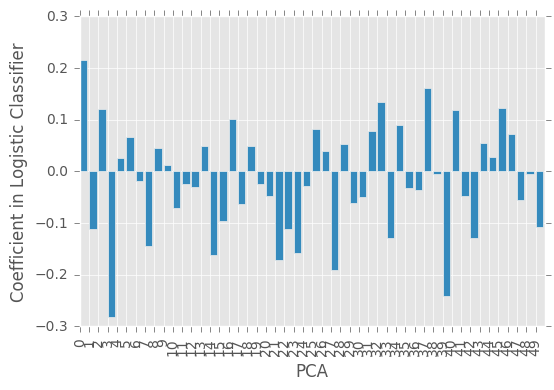

In [68]:
# To be implemented
x_range = np.arange(n_components)
y_range = logistic_clf.coef_[0]
plt.bar(x_range, y_range)
xticks = plt.xticks(x_range, rotation=90)
y_label = plt.ylabel('Coefficient in Logistic Classifier')
x_label = plt.xlabel("PCA")

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [69]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
rf_clf = RandomForestClassifier(random_state = 100, n_estimators = 50)
rf_clf.fit(train_scaled, train_y_top)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [70]:
# Get score for training set
rf_clf.score(train_scaled, train_y_top)

1.0

In [71]:
# Get score for test set
rf_clf.score(test_scaled, test_y_top)

0.7813504823151125

#### Use (Stardardized + PCA) tf-idf vectors as features

In [72]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
rf_clf = RandomForestClassifier(random_state = 100, n_estimators = 50)
rf_clf.fit(train_comp, train_y_top)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [73]:
# Get score for training set
rf_clf.score(train_comp, train_y_top)

1.0

In [74]:
# Get score for test set, REMEMBER to use PCA-transformed X!
rf_clf.score(test_comp, test_y_top)

0.76527331189710612

#### Q: What do you see from the training result and the test result?

A: The training and test score are not very different after applying for PCA. This means that no overfitting happens during training.

#### You can plot the feature importances against principal components


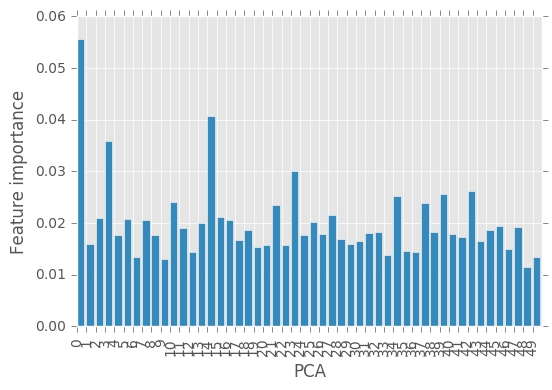

In [75]:
# To be implemented
x_range = np.arange(n_components)
y_range = rf_clf.feature_importances_
plt.bar(x_range, y_range)
xticks = plt.xticks(x_range, rotation=90)
y_label = plt.ylabel('Feature importance')
x_label = plt.xlabel("PCA")

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [81]:
# To be implemented
df["categories"].value_counts()

[Mexican, Restaurants]                                                                     1626
[Restaurants, Mexican]                                                                     1459
[Sushi Bars, Japanese, Restaurants]                                                        1438
[Pizza, Restaurants]                                                                       1403
[Korean, Japanese, Restaurants, Tapas/Small Plates, Asian Fusion, Barbeque]                1035
[Restaurants, Burgers]                                                                      959
[Italian, Restaurants]                                                                      952
[Steakhouses, Restaurants]                                                                  914
[Buffets, Sandwiches, Food, Restaurants, Breakfast & Brunch]                                774
[Restaurants, Italian]                                                                      742
[Restaurants, Pizza]                    

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [77]:
# To be implemented
# write kmeans from scratch

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [78]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [79]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [80]:
# To be implemented